In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn; sn.set()

In [41]:
all_data=pd.read_csv('all_data.csv')

In [42]:
all_data.dropna(inplace=True)

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [44]:
all_data['Order_Date']=all_data['Order Date'].str.split(" ").str.get(0)
all_data['Order_Time']= all_data['Order Date'].str.split(" ").str.get(1)
all_data['Hour']=all_data['Order_Time'].str.split(":").str.get(0)

*  Adding  a Month's column

In [45]:
all_data['Month']=all_data['Order_Date'].str[0:2] #we are getting the months column by using slicing and in this case we are taking the first two values

In [46]:
all_data.drop('Order Date',axis=1).head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Date,Order_Time,Hour,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,08,04
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,22,04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,14,04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,14,04
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,09,04


### Dropping rows based on a specific condition

In [47]:
all_data.drop(all_data[all_data['Month']=="Or"].index,inplace=True)

### Converting the  data type of Month to int

In [48]:
all_data["Price Each"]=all_data['Price Each'].astype(float)

In [49]:
all_data["Quantity Ordered"]= all_data["Quantity Ordered"].astype(int)

In [50]:
all_data['Month']=all_data['Month'].astype(int)

*  Adding a Sales Column

In [51]:
all_data["Sales"]=all_data['Price Each']*all_data['Quantity Ordered']

*  Adding City column

In [52]:
all_data["City"]=all_data['Purchase Address'].str.split(",").str.get(1)

### Question 1: What was the best month for sales? How much was earned that  month?


In [53]:
result=all_data.groupby(['Month']).sum() #just by using the sum() we can add all the numeric values
result.reset_index().head()

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06


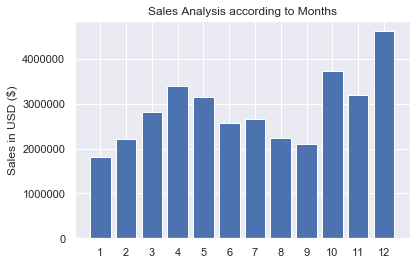

In [54]:
months=range(1,13)
plt.bar(months,result['Sales']) #always remember that we can't use the keywords given in groupby() in plt.bar like "Month" in this case
plt.title("Sales Analysis according to Months")

#modifying the graph to analyse data more easily

plt.xticks(months) #this will mark each months
plt.ylabel('Sales in USD ($)')
plt.show()

In [55]:
s=np.max(result['Sales'])
result.loc[result['Sales']==s].reset_index()

,Month,Quantity Ordered,Price Each,Sales
0,12,28114,4.588415e+06,4.613443e+06


## Question 2: What city had the highest no. of sales?

In [56]:
place= all_data.groupby(['City']).sum()
place.reset_index().head()

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta,16602,2.779908e+06,104794,2.795499e+06
1,Austin,11153,1.809874e+06,69829,1.819582e+06
2,Boston,22528,3.637410e+06,141112,3.661642e+06
3,Dallas,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles,33289,5.421435e+06,208325,5.452571e+06


In [57]:
highest_place=np.max(place['Sales'])

In [58]:
yo=place.loc[(place['Sales']==highest_place)].reset_index()

In [59]:
yo['City']

0     San Francisco
Name: City, dtype: object

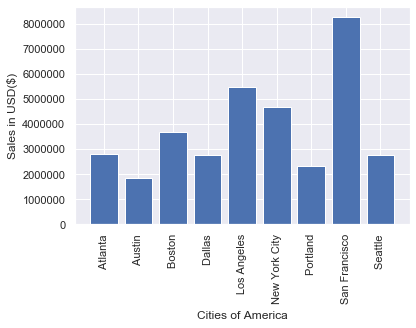

In [60]:
#tick_labels= all_data['City'].unique() #by running  this code  we are  seeing that our x-axis and y-axis is not matching so, we need to make some changes

tick_labels= [city for city ,df in all_data.groupby('City')] #this basically matches our x-axis with the y-axis
plt.bar(tick_labels,"Sales",data=place,)
plt.ylabel('Sales in USD($)')
plt.xlabel("Cities of America")
plt.xticks(ticks=tick_labels,rotation=90) #rotation is used here because the  name of the cities in the x-axis were overlapping each other
plt.show()


## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### We should show the advertisement the time at which most people buys product

In [61]:
time= all_data.groupby(['Hour']).sum()
time.reset_index().head()

,Hour,Quantity Ordered,Price Each,Month,Sales
0,00,4428,709296.70,27554,713721.27
1,01,2619,458490.00,16657,460866.88
2,02,1398,233833.64,8507,234851.44
3,03,928,144726.42,5904,145757.89
4,04,937,162058.18,6148,162661.01


In [62]:
time_max= np.max(time['Sales'])
time.loc[(time['Sales']==time_max)].reset_index()

,Hour,Quantity Ordered,Price Each,Month,Sales
0,19,14470,2398588.31,91389,2412938.54


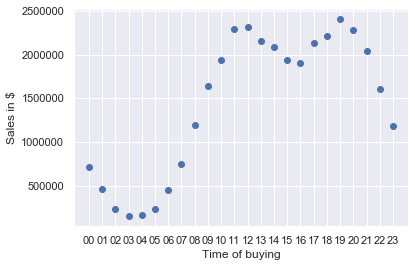

In [63]:
sorted_time=[time for time, df in all_data.groupby('Hour')]
plt.scatter(x=sorted_time,y='Sales',data=time)
plt.xlabel('Time of buying')
plt.ylabel('Sales in $')
plt.xticks(sorted_time)
plt.show()

## Question 4: What products are most often sold together?

In [64]:
df=  all_data[all_data['Order ID'].duplicated(keep=False)] #keep is assigned as false  since we want to keep  all the duplicates 

##### After obtaining  the  values with the same  Order ID now we will make a column, which will have  all the Products with same  ID in one line

In [65]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:",".join(x))
df.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date,Order_Time,Hour,Month,Sales,City,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,14,4,600.00,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,14,4,11.99,Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04/03/19,19:42,19,4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04/03/19,19:42,19,4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04/07/19,11:31,11,4,99.99,Boston,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### Drop the extra duplicates  from the dataset

In [66]:
df= df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [67]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in df['Grouped']:
    row_list= row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10): 
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5: What product sold  the most? Why do you think it sold the most?

In [68]:
#all_data.value_counts() will not give you the exact result as, there may be some faults in the dataset so, its safe  to do the groupby first

product_group= all_data.groupby('Product')
quantity_ordered= product_group.sum()
quantity_ordered.reset_index().head()

,Product,Quantity Ordered,Price Each,Month,Sales
0,20in Monitor,4129,451068.99,29336,454148.71
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40


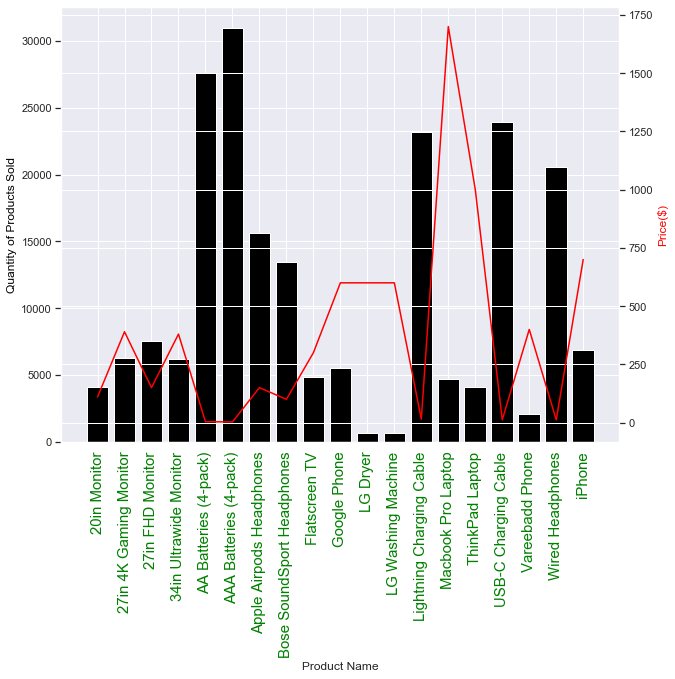

In [98]:
products=[items for items, df1 in product_group]

fig, p1= plt.subplots(figsize=(10,8))

p2=p1.twinx()

p1.bar(products,quantity_ordered['Quantity Ordered'],color='black')
p2.plot(products,product_groups,"b-",color='red')

p1.set_xticklabels(products,rotation='vertical',color='green',size=15)
p1.set_ylabel("Quantity of Products Sold",color='black',size=12)
p1.set_xlabel('Product Name',size=12)
p2.set_ylabel('Price($)',color='red',size=12)
plt.show()

#### I think that the AAA batteries sold the most since its prices are lesss but as data scientist I will prove this fact by overlaying a graph of price of each on top of the above graph

In [34]:
product_groups= all_data.groupby('Product')['Price Each'].apply(np.mean)